In [8]:
import cv2
import matplotlib.pyplot as plt 

In [9]:
img= cv2.imread("HULK.jpeg")
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow(img)

error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [ ]:
## pillow 
from PIL import Image
img1=Image.open("HULK.jpeg")
img1.show()
print(img.shape)
print(img1.size)
print(img.dtype)


(277, 182, 3)
(182, 277)
uint8


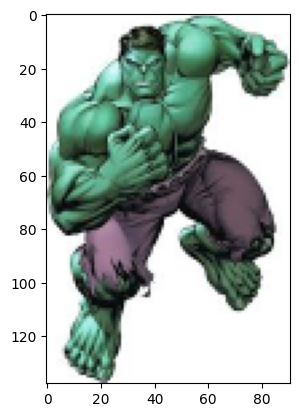

In [ ]:
scaled_image=cv2.resize(img, (1200, 200))
scaled_image=cv2.resize(img,(0,0),fx=0.5,fy=0.5)
plt.imshow(scaled_image)

In [ ]:
import numpy as np
rows,col =img.shape[:2]
tx,ty=1000, 500

NameError: name 'img' is not defined